In [1]:
import matplotlib
import Bio.SeqIO
import Bio.Restriction
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
import random
import numpy as np

In [9]:
def signmaS(length):
    singma = (0.2*0.2) + length * 0.1 * (-0.1) + length*length*0.04*0.04
    return(singma)    

values = []
lengths = []
for length in np.arange(0,50, 0.5):
    values.append(signmaS(length))
    lengths.append(length)

In [12]:
math.sqrt(signmaS(10))

0.31622776601683794

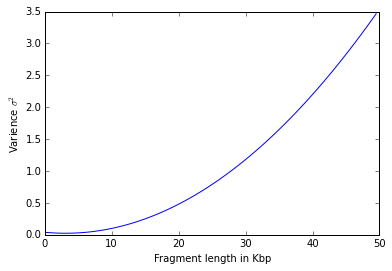

In [11]:
plt.plot(lengths,values)
plt.xlabel("Fragment length in Kbp")
plt.ylabel("Varience $\sigma^2$")

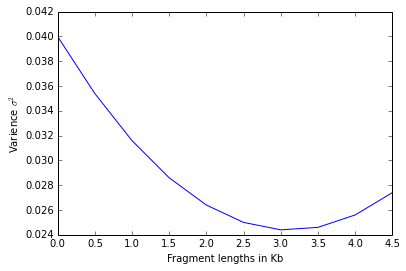

In [46]:
plt.plot(lengths,values)
plt.xlabel("Fragment lengths in Kb")
plt.ylabel("Varience $\sigma^2$")

In [24]:
def bucketupper(lower, w):
    return(lower + 2 * w * math.sqrt(signmaS(lower)))
l = 0.5
for i in range(0, 20):
    print(str(l) + "   : "+str(i))
    l = bucketupper(l, 4)

0.5   : 0
2.00519101778   : 1
3.30457808438   : 2
4.55489893309   : 3
5.88507492227   : 4
7.41480842528   : 5
9.27072101152   : 6
11.6004498377   : 7
14.5863709342   : 8
18.460848141   : 9
23.5247671364   : 10
30.1711053102   : 11
38.9155184749   : 12
50.4363877208   : 13
65.6274647921   : 14
85.6672140411   : 15
112.11023639   : 16
147.007870282   : 17
193.06732652   : 18
253.861702494   : 19


In [ ]:
for length in np.arange(0,50, 0.5):
    for i in range(0, 100):
        

In [28]:
d = 0
i = 0
for line in open("sim_single_molecule_longer_k_3_r_r"):
    d+= int(line.strip().split(" ")[2])     
    i += int(line.strip().split(" ")[6])

In [29]:
print d
print i

982
425


In [7]:
def findInsertionDeletion(fname):
    deletions = 0
    insertions = 0
    for line in open(fname):
        deletions += int(line.strip().split(" ")[2])
        insertions += int(line.strip().split(" ")[6])
    print("Deletions: "+ str(deletions))
    print("Insertions: "+ str(insertions))

In [8]:
findInsertionDeletion("sim_single_molecule_longer_k_3_r_r")

Deletions: 982
Insertions: 425


In [54]:
def noOfFragments(line):
    return((len(line.strip().split("\t"))) - 2)

def findTotalErrors(file1, file1_w_e):
    errors = []
    e_count = 0
    lines = [line.strip() for i,line in enumerate(open(file1)) if (i%3==1)]
    lines_w_e = [line.strip() for i,line in enumerate(open(file1_w_e)) if (i%3==1)]
    for i in range(len(lines)):
        errors.append(noOfFragments(lines_w_e[i]) - noOfFragments(lines[i]))
    for e in errors:
        e_count += int(e)
    return(e_count)

In [35]:
def findNoOfFragments(fname):
    lengths = []
    lines = [line.strip() for i,line in enumerate(open(fname)) if (i%3==1)]       
    for line in lines:
         lengths.append((len(line.split("\t"))) - 2)
    count = 0.0
    for length in lengths:
        count += length
    print(count/len(lines))
    plt.hist(lengths, bins = 50)

In [57]:
findTotalErrors("sim_single_molecule_longer","sim_single_molecule_without_error_longer")

1816

In [237]:
read_c = "	XhoI	XhoI	85.856	28.703	4.878	24.503	84.549	3.166	25.931	24.461	68.447	70.083	30.152	24.183	11.068	3.284	6.952	28.481	19.404	44.525	38.583	36.019	76.733	3.374	13.436	27.244	13.969	7.883	1.62	58.762	3.167	4.471"
read = "	XhoI	XhoI	88.487	28.277	4.761	108.091	3.003	25.838	23.999	67.249	68.225	30.854	25.782	11.655	3.409	34.424	20.933	43.642	36.799	36.273	74.788	3.333	13.555	27.912	13.954	7.864	1.96	52.081	3.058	4.219"

In [499]:
def signmaS(length):
    singma = float((0.2*0.2) + (length * 0.1 * (-0.1)) + (length*length*0.04*0.04))
    return(singma)

def giveBellRange(sigma):
    return(3 * math.sqrt(sigma))

def findErrors(c_read, read):
    deletion_index = []
    deletion_count = 0
    
    c_frag = c_read.strip().split("\t")
    del c_frag[0:2]
    c_frag = [float(f) for f in c_frag]
    
    frag = read.strip().split("\t")
    del frag[0:2]
    frag = [float(f) for f in frag]
    print(frag)
    print(c_frag)
    j = 0
    for i, c_v in enumerate(c_frag):
        d3 = giveBellRange(signmaS(c_v))                
        aggr = 0.0
        while(True):
            aggr = aggr + frag[j]
            if(aggr <= (c_v + d3) and aggr >= (c_v - d3)):
               j+=1;
               break;                                    
            else:
                deletion_index.append(j)
                deletion_count+=1
                j+=1
                print(j)
    return([deletion_count,deletion_index])

In [249]:
findErrors(read,read_c)

[85.856, 28.703, 4.878, 24.503, 84.549, 3.166, 25.931, 24.461, 68.447, 70.083, 30.152, 24.183, 11.068, 3.284, 6.952, 28.481, 19.404, 44.525, 38.583, 36.019, 76.733, 3.374, 13.436, 27.244, 13.969, 7.883, 1.62, 58.762, 3.167, 4.471]
[88.487, 28.277, 4.761, 108.091, 3.003, 25.838, 23.999, 67.249, 68.225, 30.854, 25.782, 11.655, 3.409, 34.424, 20.933, 43.642, 36.799, 36.273, 74.788, 3.333, 13.555, 27.912, 13.954, 7.864, 1.96, 52.081, 3.058, 4.219]
4
15
28
29
30


IndexError: list index out of range

In [366]:
c_read = "	XhoI	XhoI	2.412	8.396	4.396	48.964	34.111	55.638	56.159	48.165	2.099	13.095	111.629	66.318	116.01	20.27"
read = "	XhoI	XhoI	15.489	49.737	33.673	54.262	57.077	47.537	2.08	13.176	174.37	115.055	20.503"

In [372]:
c_read = "	XhoI	XhoI	85.856	28.703	4.878	24.503	84.549	3.166	25.931	24.461	68.447	70.083	30.152	24.183	11.068	3.284	6.952	28.481	19.404	44.525	38.583	36.019	76.733	3.374	13.436	27.244	13.969	7.883	1.62	58.762	3.167	4.471"
read = "	XhoI	XhoI	88.487	28.277	4.761	108.091	3.003	25.838	23.999	67.249	68.225	30.854	25.782	11.655	3.409	34.424	20.933	43.642	36.799	36.273	74.788	3.333	13.555	27.912	13.954	7.864	1.96	52.081	3.058	4.219"

In [374]:
c_read = "	XhoI	XhoI	5.458	36.938	19.058	4.897	32.535	3.642	4.556	17.626	3.007	12.754	28.213	0.73	26.3	33.522	9.614	27.279	28.887	13.417	2.786	21.812	24.018	7.009	14.835	72.12	9.739	10.36	64.508	11.884	18.627	28.582	1.557	2.506	1.913	11.641	15.44	8.697	6.17	45.312	4.218	15.062	20.234	12.854	12.396	48.964	34.111	55.638	56.159	40.422"
read = "	XhoI	XhoI	43.904	17.833	5.052	31.857	8.315	21.459	12.728	27.013	0.714	62.408	9.538	52.917	13.121	2.677	46.168	6.965	14.937	69.98	9.231	10.549	70.151	30.603	27.33	1.557	2.267	13.717	14.854	7.904	6.629	44.587	4.063	14.407	20.164	24.548	49.608	34.996	56.041	54.079	39.948"

In [857]:
def noOfFragments(line):
    return((len(line.strip().split("\t"))) - 2)

def signmaS(length):
    singma = float((0.2*0.2) + (length * 0.1 * (-0.1)) + (length*length*0.04*0.04))
    return(singma)

def giveBellRange(sigma):
    return(4.0 * math.sqrt(sigma))

def findErrors(read, c_read):
    deletion_index = []
    deletion_count = 0
    
    c_frag = c_read.strip().split("\t")
    del c_frag[0:2]
    c_frag = [float(f) for f in c_frag]
    
    frag = read.strip().split("\t")
    del frag[0:2]
    frag = [float(f) for f in frag]
    j = 0
    pad = 0
    for i, c_v in enumerate(c_frag):
        c_v = c_v + pad
        d3 = giveBellRange(signmaS(c_v))
        if(j>=len(frag)):
            break;
        #print(str(i)+" => "+str(frag[j]) + " "+ str(c_v - d3) + " "+ str(c_v + d3) + " d3: "+str(d3)+" c_v: "+str(c_v) + " Count = "+ str(deletion_count))
        if(frag[j] <= (c_v + d3) and frag[j] >= (c_v - d3)):
            j+=1
            pad = 0
        elif((c_v - d3) > frag[j]):            
            pad = c_frag[i]
            d3 = giveBellRange(signmaS(c_frag[i]))
            if(frag[j] <= (c_frag[i] + d3) and frag[j] >= (c_frag[i] - d3)):
                j+=1        
                pad = 0
        else:
            pad = pad + c_frag[i]
            deletion_index.append(i)
            deletion_count+=1     
            
    return([deletion_count,deletion_index, (noOfFragments(c_read) - noOfFragments(read))])

def errors(fname, c_fname):    
    lines = [line for i,line in enumerate(open(fname)) if (i%3==1)]
    c_lines = [line for i,line in enumerate(open(c_fname)) if (i%3==1)]
    notFineList = []
    FineList = []
    fullList = []
    
    #print(lines[114])
    #print(c_lines[114])
    #print(findErrors(lines[114], c_lines[114]))
    #return    
    for i,line in enumerate(lines):
        #print(lines[i])
        #print(c_lines[i])
        #print(findErrors(lines[i], c_lines[i]))
        #print(i)
        E = findErrors(lines[i], c_lines[i])
        E = [i] + E # add read number
        fullList.append(E)
        if(E[1] == E[3]):
            FineList.append(E)
        else:
            notFineList.append(E)            
    return([FineList, notFineList, fullList])

In [939]:
EC = errors("sim_single_molecule_100_corrected", "sim_single_molecule_100_efree")
print(len(EC[0]))
print(len(EC[1]))
E = errors("sim_single_molecule_100_newDel", "sim_single_molecule_100_efree")
print(len(E[0]))
print(len(E[1]))
print(EC[2][7])

179
189
344
24
[7, 18, [0, 5, 7, 13, 19, 20, 21, 22, 23, 25, 26, 29, 32, 36, 42, 44, 45, 46], 18]


In [876]:
for i in range(0, len(EC[2])):
    if(EC[2][i][3] < E[2][i][3]):
        print(str(EC[2][i]) + "\t" +  str(E[2][i]))  

[1, 8, [2, 8, 9, 11, 12, 13, 15, 19], 3]	[1, 4, [1, 7, 9, 19], 4]
[2, 10, [0, 7, 13, 14, 16, 20, 21, 22, 23, 24], 8]	[2, 9, [0, 7, 8, 10, 14, 15, 17, 19, 21], 9]
[5, 6, [0, 3, 4, 8, 19, 22], 2]	[5, 6, [0, 2, 4, 12, 13, 16], 6]
[8, 5, [0, 4, 9, 17, 20], 6]	[8, 8, [1, 4, 11, 13, 17, 20, 26, 30], 8]
[12, 6, [3, 4, 5, 6, 8, 19], 4]	[12, 10, [3, 6, 10, 15, 20, 21, 23, 30, 37, 38], 10]
[13, 7, [1, 5, 20, 21, 22, 29, 32], 3]	[13, 9, [5, 7, 8, 18, 19, 22, 29, 32, 34], 9]
[14, 6, [6, 7, 10, 13, 19, 20], 2]	[14, 4, [1, 8, 10, 19], 4]
[16, 7, [0, 11, 16, 18, 19, 20, 21], 5]	[16, 6, [0, 5, 11, 12, 13, 20], 6]
[17, 4, [0, 4, 11, 14], 3]	[17, 8, [0, 2, 6, 8, 12, 18, 25, 31], 8]
[20, 5, [8, 14, 16, 18, 21], 5]	[20, 8, [0, 1, 7, 8, 9, 19, 23, 32], 8]
[26, 10, [1, 3, 7, 8, 10, 11, 18, 19, 20, 21], 5]	[26, 8, [3, 6, 16, 18, 22, 24, 28, 33], 8]
[27, 14, [0, 3, 5, 15, 16, 17, 19, 24, 25, 26, 27, 28, 29, 31], 5]	[27, 8, [0, 3, 4, 16, 17, 27, 28, 31], 8]
[32, 5, [2, 9, 15, 18, 22], 6]	[32, 7, [7, 9, 11, 15,

In [940]:
lines = [line for i,line in enumerate(open("sim_single_molecule_100_newDel")) if (i%3==1)]
c_lines = [line for i,line in enumerate(open("sim_single_molecule_100_efree")) if (i%3==1)]
lines_corrected = [line for i,line in enumerate(open("sim_single_molecule_100_corrected")) if (i%3==1)]
S = (lines[1] + "\n" + c_lines[1] + "\n" + lines_corrected[1])
print(S)
lines = S.split("\n")
print("\nErrored\n")
print("\n".join(lines[0].strip().split("\t")))
print("\nError Free\n")
print("\n".join(lines[2].strip().split("\t")))
print("\nCorrected\n")
print("\n".join(lines[4].strip().split("\t")))

	XhoI	XhoI	56.831	20.481	66.57	11.365	18.19	30.223	4.41	10.779	16.155	8.466	6.104	45.186	4.209	15.126	19.258	12.922	63.763	30.327

	XhoI	XhoI	58.202	9.739	10.36	64.508	11.884	18.627	28.582	1.557	2.506	1.913	11.641	15.44	8.697	6.17	45.312	4.218	15.062	20.234	12.854	12.396	48.964	30.026

	XhoI	XhoI	31.948	10.165	66.570	11.365	18.190	30.223	2.741	2.422	10.779	16.155	8.466	6.104	45.186	4.209	15.126	19.258	12.922	63.763	30.327


Errored

XhoI
XhoI
56.831
20.481
66.57
11.365
18.19
30.223
4.41
10.779
16.155
8.466
6.104
45.186
4.209
15.126
19.258
12.922
63.763
30.327

Error Free

XhoI
XhoI
58.202
9.739
10.36
64.508
11.884
18.627
28.582
1.557
2.506
1.913
11.641
15.44
8.697
6.17
45.312
4.218
15.062
20.234
12.854
12.396
48.964
30.026

Corrected

XhoI
XhoI
31.948
10.165
66.570
11.365
18.190
30.223
2.741
2.422
10.779
16.155
8.466
6.104
45.186
4.209
15.126
19.258
12.922
63.763
30.327


In [863]:
EC[2][2][3]

8

In [9]:
lines = [len(line.strip().split(" ")) for line in open("sim_single_molecule_100_elocations")]
count = 0
counttotal = 0
for i, line in enumerate(lines):
    if(line > EC[2][i][3]):
        counttotal+=line
        count += (line - EC[2][i][3])
print("Total: "+ str(counttotal) + "\ncorrected: " + str(count))

NameError: name 'EC' is not defined

In [4]:
lines = [line.strip().split(" ") for line in open("sim_single_molecule_100_elocations")]
lines_ef = [line.strip().split() for i,line in enumerate(open("sim_single_molecule_100_efree")) if (i%3==1)]
for line in lines:
    for i in line:
        

IndentationError: expected an indented block (<ipython-input-4-a19136fcf14d>, line 5)

In [17]:
def findInsertionDeletion(fname):
    deletions = 0
    insertions = 0
    for line in open(fname):
        deletions += int(line.strip().split(" ")[2])
        insertions += int(line.strip().split(" ")[6])
    print("Deletions: "+ str(deletions))
    print("Insertions: "+ str(insertions))

In [18]:
findInsertionDeletion("corrected")

Deletions: 860
Insertions: 1699


In [836]:
413/593.0

0.6964586846543002

In [841]:
# your code goes here
sum = 10
A = [3, 7, 2, 5, 6, 4]
D = {}
for a in A:
    D[a] = 1
for a in A:    
    if(D.has_key(sum - a)):
        print(str(a) + " " + str(sum - a))

3 7
7 3
5 5
6 4
4 6


In [14]:
def noOfFragments(line):
    return((len(line.strip().split("\t"))) - 2)

def findTotalErrors(file1, file1_w_e):
    errors = []
    e_count = 0
    lines = [line.strip() for i,line in enumerate(open(file1)) if (i%3==1)]
    lines_w_e = [line.strip() for i,line in enumerate(open(file1_w_e)) if (i%3==1)]
    for i in range(len(lines)):
        errors.append(noOfFragments(lines_w_e[i]) - noOfFragments(lines[i]))
    for e in errors:
        e_count += int(e)
    return(e_count)

In [15]:
findTotalErrors("sim_single_molecule_100_newDel","sim_single_molecule_100_efree")

5524

In [16]:
findTotalErrors("sim_single_molecule_100_corrected","sim_single_molecule_100_efree")

800

In [915]:
lines = S.split("\n")
print("\n".join(lines[1].strip().split("\t")))

In [912]:
A = ["ssa", "tsx"]
B = "sa"
print("\n".join(A))

ssa
tsx


In [920]:
lines[4]

'\tXhoI\tXhoI\t19.206\t64.657\t68.451\t82.015\t35.874\t11.383\t3.258\t6.948\t28.365\t19.128\t51.210\t38.302\t36.137\t78.898\t3.285\t16.386\t27.898\t14.684\t1.603\t58.576\t49.088\t24.635\t44.991\t38.679\t7.808\t4.952\t33.224\t18.560\t22.910\t10.520\t39.991\t38.868\t6.724\t4.591\t16.345\t61.072\t13.336\t12.346\t19.405\t8.636'

In [941]:
L = "-1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 -1\n" + "9 12 12 13 16 20 10 19 22 20 22 20 20 18 21 15 10"
L = L.split("\n")
L = "\n".join(L[0].split(" ")) + "\n------------------ \n" +"\n".join(L[1].split(" "))
print L

-1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
-1
------------------ 
9
12
12
13
16
20
10
19
22
20
22
20
20
18
21
15
10


In [1028]:
map = dict()
A = ['b','a','d','b','b','b','c','a','b']
first = '0'
for a in A:
    if map.has_key(a):
        if(map[a][0] != '0'):
            map[map[a][0]] = [map[map[a][0]][0], map[a][1]]
            map[a] = ['0', first]   
            map[first] = [a,map[first][1]]
            first = a
    else:           
        if first != '0' :
            map[first] = [a, map[first][1]]
        map[a]= ['0', first]
        first = a
        
def giveLastN(map, n, first):
    cur = first
    while(n > 0 and cur != '0'):        
        print(cur)
        cur = map[cur][1]
        n-=1

In [1029]:
print map

{'a': ['b', 'c'], 'c': ['a', 'd'], 'b': ['0', 'a'], 'd': ['b', '0']}


In [1033]:
giveLastN(map, 1, first)

b


In [1025]:
first

'd'

In [1043]:
class TradeTracker(object):
    def __init__(self):
        self.map = dict()
        self.first = '0'

    def addTrade(self, A):
        for a in A:
            if  self.map.has_key(a):
                if(self.map[a][0] != '0'):
                    self.map[self.map[a][0]] = [self.map[self.map[a][0]][0], self.map[a][1]]
                    self.map[a] = ['0', self.first]   
                    self.map[self.first] = [a,self.map[self.first][1]]
                    self.first = a
            else:
                if self.first != '0' :
                    self.map[self.first] = [a, self.map[self.first][1]]
                self.map[a]= ['0', self.first]
                self.first = a
        
    def giveLastN(self, n):
        cur = self.first
        while(n > 0 and cur != '0'):        
            print(cur)
            cur = self.map[cur][1]
            n-=1
            
A = ['b','a','d','b','b','b','c','a','b','a','a','k']
T = TradeTracker();
T.addTrade(A)
T.giveLastN(4)

k
a
b
c


In [1069]:
def nextRange(cur_range, bin_size, s_varience):
    if(cur_range < 2000):
        return(cur_range + bin_size)
    else:
        return(round(((double)(cur_range/1000.0) + 3 * math.sqrt(((float)(cur_range/1000.0)) * s_varience))*1000))

In [1067]:
# standard deviation with Bionano data
def signmaS(len):
    singma = (0.2*0.2) + len * 0.1 * (-0.1) + len*len*0.04*0.04
    return(singma)

In [1068]:
signmaS(0.3)

0.037144

In [1094]:
quantizeList = []
def quantize(val, bin_size, s_varience):    
    if(val == 0):
        return;
    
    if(quantizeList.size() == 0):
        quantizeList.push_back(0.0)
        quantizeList.push_back(nextRange(0.0, bin_size, s_varience))

    for i in range(0, quantizeList.len):
        if(val < quantizeList[i]):        
            val = quantizeList[i-1];
            return;

    while(1):
        quantizeList.append(nextRange(quantizeList[len(quantizeList) - 1], bin_size, s_varience))
        if(val < quantizeList[len(quantizeList) - 1]):
            val = quantizeList[len(quantizeList) - 2]
            return

In [1094]:
len(quantizeList)

In [1095]:
quantize(1000, 300, )

TypeError: quantize() takes exactly 3 arguments (2 given)

In [1150]:
# standard deviation with Bionano data
def signmaS(len):
    singma = (0.2*0.2) + len * 0.1 * (-0.1) + len*len*0.04*0.04
    return(math.sqrt(singma))

def nextRange(pre_val, folds):
    S = signmaS(float(pre_val/1000.0))
    d = (2.0 * folds * S) * 1000
    return(int(pre_val + d))

quantizeList = []
def quantizeNew(val):
    folds = 3
    start = 500
    if(val <= start):
        return;
    if(len(quantizeList) == 0):
        quantizeList.append(start)
        quantizeList.append(nextRange(start, folds))
    
    for i in range(0, len(quantizeList)):
        if(val < quantizeList[i]):        
            val = quantizeList[i-1];
            return(val);
        
    while(1):
        quantizeList.append(nextRange(quantizeList[len(quantizeList) - 1], folds))
        if(val < quantizeList[len(quantizeList) - 1]):
            val = quantizeList[len(quantizeList) - 2]
            return(val)

In [1169]:
quantizeNew(20000)

19012

In [1167]:
signmaS(0.5)

0.1881488772222678

# ================================================

In [2]:
# standard deviation with Bionano data
def signmaS(len):
    singma = (0.2*0.2) + len * 0.1 * (-0.1) + len*len*0.04*0.04
    return(singma)

handle = open("/s/fir/a/nobackup/data/ECOLI_Reference_Genome/ecoli.fa", "rU")
for record in Bio.SeqIO.parse(handle, "fasta"):
    ref_seq = record.seq
frag_sizes = [len(seq) for seq in Bio.Restriction.XhoI.catalyse(ref_seq)]

def subseq(seq, limits):
    x,y = limits
    if x < y : return seq[x:y]
    return seq[x:len(seq)] + seq[0:y]

molecules = []
for i in range(200):
    breaks = []
    num_breaks = 10 #random.randint(20,50)
    for j in range(num_breaks):
        breaks.append(random.randint(0,len(ref_seq) - 1))
    breaks.sort()        
    pairs = [(x,y) for x,y in zip(breaks[:-1], breaks[1:])] + [(breaks[-1], breaks[0])]
    molecules += [[subseq(ref_seq, pair), pair] for pair in pairs]

In [3]:
def generateRandomList(listv, count):
    randomList = []
    randomListIndex = []
    if(count >= len(listv) + 1):
        return(randomListIndex, randomList)
    if(count <= 0):
        return(randomListIndex, randomList)
    if(len(listv) == 0):
        return(randomListIndex, randomList)
    
    index = range(0, len(listv))
    for c in range(0, count):
        i = random.choice(index)
        randomList.append(listv[i])
        randomListIndex.append(i)
        index.remove(i)
    
    randomListIndex, randomList = zip(*sorted(zip(randomListIndex,randomList)))
    return(randomListIndex, randomList)

def deleteRandomly(listv, count):
    deleted = generateRandomList(listv, count)
    deleted_index = list(deleted[0])
    deleted_values = list(deleted[1])    
    for d in deleted_values:
        listv.remove(d)
    return(listv, deleted_index, deleted_values)

def insertVal(A, val):
    idx = A.index(val)
    if(idx + 1 != len(A)):
        A.insert(idx + 1, random.randint(A[idx], A[idx + 1] ))
    else:
        A.insert(idx, random.randint(A[idx-1], A[idx]))
        
def addfalsepositive(listv, count):
    if(count == 0):
        return(listv, count)
    sel_cites,sel_val = generateRandomList(listv, count)
    for val in sel_val:
        insertVal(listv, val)
    return(listv, count)

def sim(mol):
    "Return a simulated set of fragment sizes in bp for a Bio.SeqIO seq"    
    sites = [biosite - 1 for biosite in Bio.Restriction.XhoI.search(mol)]
    e_f_sites = list(sites);    
    sites, dindex, dsites = deleteRandomly( sites, int(round(len(sites)/6.66)))
    sites, ins_err = addfalsepositive(sites, int(round(len(mol)/100000.0)))
    allsites = [0] + sites + [len(mol)]
    e_f_allsites = [0] + e_f_sites + [len(mol)]    
    # TODO add random break sites
    sizes = [y - x for x,y in zip(allsites[:-1], allsites[1:])]
    e_f_sizes = [y - x for x,y in zip(e_f_allsites[:-1], e_f_allsites[1:])]
    sizes = [size/1000.0 for size in sizes] # convert to kb
    e_f_sizes = [size/1000.0 for size in e_f_sizes] # convert to kb    
    sizes = [size + random.gauss(0, math.sqrt(signmaS(size))) for size in sizes if size > 0.5]
    sizes = [size for size in sizes if size > 0.5]
    e_f_sizes = [size for size in e_f_sizes if size > 0.5]
    return (sizes, e_f_sizes, dindex, ins_err)

In [4]:
filename = "sim_single_molecule_100"
m = open(filename+"_newDel","w")
mwe = open(filename+"_efree","w")
efile  = open(filename+"_elocations","w")

start = 0
end = 0
length_of_original = []
length_of_errored = []
accum = 0
tot_ins_err = 0
tot_del_err = 0
for i, mol in enumerate((molecule for molecule in molecules if len(molecule[0]) > 250000)):
    simulated = sim(mol[0])      
    lens = [str(round(frag,3)) for frag in simulated[0]]
    if len(lens) < 10: continue
    map_name = "map_" + str(i) + "\n"
    
    lens_e_free = [str(round(frag,3)) for frag in simulated[1]]
    length_of_errored.append(len(lens))
    length_of_original.append(len(lens_e_free))
    #if i == 100: break
    tot_ins_err += simulated[3]
    tot_del_err += len(simulated[2])
    
    if(start == 0 and end ==0):
        start = mol[1][0]
        end = mol[1][1]
    
#    elif(start <= mol[1][0] and mol[1][0] >= end):
#    if((start <= mol[1][0] and mol[1][0] <= end) or (start <= mol[1][1] and mol[1][1] <= end) or (start >= mol[1][0] and mol[1][1] >= end)):
    m.write(map_name)
    m.write("\tXhoI\tXhoI\t" + "\t".join(lens) + "\n")
    m.write("\n")

    mwe.write(map_name)
    mwe.write("\tXhoI\tXhoI\t" + "\t".join(lens_e_free) + "\n")
    mwe.write("\n")

    efile.write(' '.join([str(s) for s in simulated[2]]))
    efile.write("\n")
"""        
    elif(start <= mol[1][1] and mol[1][0] >= end):
        m.write("map_" + str(i) + "\n")
        m.write("\tXhoI\tXhoI\t" + "\t".join(lens) + "\n")        
        m.write("\n")
        
        mwe.write(map_name)
        mwe.write("\tXhoI\tXhoI\t" + "\t".join(lens_e_free) + "\n")
        mwe.write("\n")
                
        efile.write(' '.join([str(s) for s in simulated[2]]))
        efile.write("\n")
"""
m.close()
mwe.close()
efile.close()

In [92]:
print(tot_ins_err)
print(tot_del_err)

8295
4835


In [9]:
sim(molecules[8][0])

([16.661084748208314,
  43.70944988565148,
  36.68483729040059,
  6.166476837458508,
  2.2833071155421356,
  4.678181974795673,
  28.39280830620119,
  4.72748533400852,
  6.349912406371118,
  11.665345742826457,
  11.98442646820368,
  5.1987928289760035,
  10.29788725160603,
  21.450466784232596,
  20.80503321462935,
  45.539693030552435,
  16.693412325513393,
  11.868400426718367,
  3.0677588944895344,
  1.5738562963077127,
  11.069184117362395,
  3.697835722660505,
  17.868432926059306,
  40.853293336586944,
  6.515085925338014,
  6.736002721819806,
  32.26512551441425,
  8.038889568497952,
  16.315186447704882,
  0.9780097524662003,
  26.1015410585528],
 [16.373,
  44.498,
  39.605,
  8.075,
  4.687,
  32.319,
  18.488,
  17.26,
  10.482,
  42.73,
  37.485,
  6.481,
  29.06,
  4.547,
  14.475,
  60.323,
  13.128,
  12.437,
  19.199,
  8.085,
  17.715,
  25.914],
 [10, 17, 18],
 13)

In [57]:
A = []
deleteRandomly(A,7)
#random.choice()

([], [], [])

In [153]:
A = [43196, 225524, 257866, 272748]
addfalsepositive(A, 1)
print(A)

[43196, 91066, 225524, 257866, 272748]


In [115]:
A = [43196, 225524, 257866, 272748]

        
insertVal(A, 43196)

In [116]:
A

[43196, 82743, 225524, 257866, 272748]

In [82]:
len(A)

4

In [163]:
round(len(molecules[5][0])/100000.0)

3.0

In [6]:
!/s/oak/b/nobackup/darshanw/valuev_optmap_alignment-master/ovlp/ovlp

Usage:
ovlp <Map_File> <Ouput> <Range num1> <Range num2>


In [139]:
def createExcel(copies, tot_del, tol_ins, in_file):
    lines = [line for line in open(in_file)]    
    print("Copies,K,MIN COMMON K IN READS (m),MIN_CONSENSUS (d),Deletions, Insertions,Reads aligned (B),Avg S-score (B),Reads aligned (A),Avg S-score (A)")            
    for i in range(0, len(lines)/7):
        k = lines[0+i*7].strip().split(" ")[1]
        m = lines[0+i*7].strip().split(" ")[4]
        d = lines[0+i*7].strip().split(" ")[8]    
        no_algn_r_B = lines[1+i*7].strip().split(":")[1].strip().split("(")[0]
        tot_r = lines[1+i*7].strip().split(":")[1].strip().split("(")[1].split(")")[0]
        avg_S_B = lines[2+i*7].strip().split(":")[1].strip()
        no_algn_r_A = lines[3+i*7].strip().split(":")[1].strip().split("(")[0]
        avg_S_A = lines[4+i*7].strip().split(":")[1].strip()
        deletion = lines[5+i*7].strip().split(":")[1].strip()
        insertion = lines[6+i*7].strip().split(":")[1].strip()
        print(str(copies)+","+str(k)+","+str(m)+","+str(d)+","+str(deletion)+"["+tot_del+"]"+","+str(insertion)+"["+tol_ins+"]"+","+str(no_algn_r_B)+"["+str(tot_r)+"],"+str(avg_S_B)+","+str(no_algn_r_A)+"["+str(tot_r)+"],"+str(avg_S_A))    

In [140]:
createExcel("100", "2364", "1005", "/s/oak/b/nobackup/darshanw/COmap/test/with-100")

Copies,K,MIN COMMON K IN READS (m),MIN_CONSENSUS (d),Deletions, Insertions,Reads aligned (B),Avg S-score (B),Reads aligned (A),Avg S-score (A)
100,3,3,3,871[2364],674[1005],406[569],83.6360800493,350[569],74.4751637143
100,3,3,4,725[2364],542[1005],406[569],83.6360800493,364[569],76.1814417582
100,3,4,3,722[2364],521[1005],406[569],83.6360800493,373[569],75.1897680965
100,3,4,4,591[2364],409[1005],406[569],83.6360800493,379[569],77.4527548813
100,3,5,3,602[2364],409[1005],406[569],83.6360800493,377[569],76.4011779841
100,3,5,4,452[2364],313[1005],406[569],83.6360800493,386[569],78.6214935233
100,3,6,3,465[2364],311[1005],406[569],83.6360800493,381[569],78.1248698163
100,3,6,4,339[2364],222[1005],406[569],83.6360800493,393[569],79.8416101781
100,4,3,3,541[2364],392[1005],406[569],83.6360800493,376[569],77.6900329787
100,4,3,4,410[2364],284[1005],406[569],83.6360800493,381[569],80.5583664042
100,4,4,3,365[2364],260[1005],406[569],83.6360800493,382[569],79.4010798429
100,4,4,4,233[2364],1

In [187]:
A = """344[2049]"""

In [188]:
A = A.split("\n")
for i in range(0, len(A)):    
    val = A[i].strip().split("[")[0]
    tot = A[i].strip().split("[")[1].split("]")[0]
    percent = (float(val)/float(tot))*100.0
    percent = round(percent,2)
    print(str(percent)+"% ["+str(val)+"]")

16.79% [344]


In [149]:
A[0]

'871[2364]'

In [ ]:
for i in range(0, 1000000000):
    i = i + 10
    i = i - 10

In [457]:
A = """map_0
	XhoI	XhoI	42.775	51.518	16.481	37.904	4.946	35.071	17.61	58.586	28.871	14.231	71.874	55.145	2.763	37.516	2.107	3.698	2.894	16.741	60.041	36.938	19.058	4.897	32.535	3.642	4.556	17.626	3.007	12.754	28.213	26.3	33.522	9.614	27.279	28.887	13.417	2.786	21.812	24.018	7.009	14.835	72.12	9.739	10.36	64.508	11.884	18.627	28.582	1.557	2.506	1.913	11.641	15.44	8.697	6.17	45.312	4.218	15.062	20.234	12.854	12.396	48.964	34.111	55.638	56.159	48.165	2.099	13.095	7.375

"""
B = """map_0
	XhoI	XhoI	44.617	51.091	16.655	38.27	4.801	34.72	18.1	86.118			14.007	69.636	55.972	37.284			2.474	3.766	2.598	16.698	60.875	36.399	18.954	5.025	32.848	7.911	20.872	13.18	26.291	4.137	22.175	44.452	28.029	29.394	11.691	1.801	23.03	23.284	7.059	14.563	69.41	9.619	72.232	11.745	18.805	30.361	1.501	2.471	1.718	11.645	14.989	14.565	42.496	19.018	18.792	9.871	2.773	60.874	32.248	59.05	40.6	15.116	53.477	15.904	7.436

"""
L = "1,11,14,17 : 2"
def countContinuous(V):    
    count = 0;
    V = [int(v) for v in V]
    for i in range(0,len(V)):
        if(i == 0):
            vprev = int(V[i])
        else:
            if(V[i] == (vprev + 1)):
                count+=1
                print("I'm here")
            vprev = V[i]
    return(count)

e_f = A.strip().split("\n")[1].strip().split("\t")[2:]
w_e = B.strip().split("\n")[1].strip().split("\t")[2:]

deletion = L.strip().split(":")[0].strip().split(",")
insertion = L.strip().split(":")[1].strip().split(",")

print(len(e_f))
print(len(w_e))
print(len(e_f) - len(w_e))
print(len(deletion))
print(countContinuous(deletion))
print(len(insertion))
print(countContinuous(insertion))

def findTrueErrorLocation(E):
    deletion = E.strip().split(":")[0].strip().split(",")
    insertion = E.strip().split(":")[1].strip().split(",")
    insertion = [ (int(insertion[i])+i) for i in range(0, len(insertion))]
    deletion = [ (int(deletion[i])-i) for i in range(0, len(deletion))]
    for z in range(0,len(deletion)):
        less = [i for i in insertion if i < deletion[z]]
        deletion[z] = deletion[z] + len(less)        
    return(deletion, insertion)

findTrueErrorLocation(L)

68
65
3
4
0
1
0


([1, 11, 13, 15], [2])

In [307]:
import random 
def insertVal(A, val):
    idx = A.index(val)
    if(idx + 1 != len(A)):
        A.insert(idx + 1, random.randint(A[idx], A[idx + 1] ))
    else:
        A.insert(idx, random.randint(A[idx-1], A[idx]))

In [351]:
A = [10,20,30,40,50,60,70,80,90]
insertVal(A, 10)
insertVal(A, 20)
for a in A:
    if(a ==50):
        continue
A =  [if(a == 50) else a for a in A ]
A

SyntaxError: invalid syntax (<ipython-input-351-b909ad99ed5e>, line 4)

In [316]:
def insertVal(A, val):
    idx = A.index(val)
    if(idx == 0):
        A.insert(idx, random.randint(0, A[idx]))
    else:
        A.insert(idx, random.randint((A[idx - 1 ]), A[idx]))

In [766]:
A = """Base read aligned to: 11 map_793
Starting at: 6 -> 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 
Base read aligned to: 6 map_331
Starting at: 3 -> -1 -1 1 8 8 2 1 1 1 2 1 -1 1 1 1 1 
Base read aligned to: 2 map_447
Starting at: 27 -> -1 1 -1 1 3 8 8 1 1 2 3 1 1 1 1 1 
Base read aligned to: 3 map_115
Starting at: 0 -> -1 1 -1 1 3 1 1 1 1 1 -1 1 1 1 0 0 
Base read aligned to: 8 map_1579
Starting at: 0 -> 0 -1 -1 -1 2 1 1 1 1 8 8 1 1 1 2 1 
Base read aligned to: 12 map_19
Starting at: 15 -> -1 1 1 1 -1 4 1 1 -1 1 1 1 1 1 1 1 
Base read aligned to: 1 map_1530
Starting at: 11 -> 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 
Base read aligned to: 13 map_1179
Starting at: 12 -> 0 -1 -1 1 1 2 1 1 1 1 1 -1 1 1 1 1 
Base read aligned to: 7 map_955
Starting at: 0 -> -1 1 -1 1 3 1 -1 1 1 1 1 1 1 1 2 1 
Base read aligned to: 10 map_175
Starting at: 9 -> 0 0 0 0 0 1 -1 1 1 1 1 1 1 1 1 1 
Base read aligned to: 9 map_136
Starting at: 0 -> -1 1 -1 1 2 8 8 1 1 1 1 1 1 1 1 1 
Base read aligned to: 4 map_2320
Starting at: 17 -> -1 1 8 8 2 2 1 1 1 1 2 1 1 1 1 1 
Base read aligned to: 5 map_919
Starting at: 0 -> 8 8 -1 1 2 1 1 1 1 1 2 1 1 1 -1 1
"""

In [769]:
from collections import Counter
def getCountStat(A, loc):
    alignment = A.strip().split("\n")
    alignment = [alignment[i] for i in range(0, len(alignment)) if i%2 == 1]
    countLoc = []
    for line in alignment:
        line = line.strip().split("->")[1]
        line = line.strip().split(" ")
        countLoc.append(line[loc])
    print(Counter(countLoc))
    print(len(alignment))
getCountStat(A, 1)

Counter({'1': 6, '0': 3, '-1': 3, '8': 1})
13


In [495]:
def createExcel(copies, tot_del, tot_ins, in_file):
    lines = [line for line in open(in_file)]    
    print("Copies,K,MIN COMMON K IN READS (m),MIN_CONSENSUS (d),Deletions,True +ve (Del),Insertions,True +ve (Ins),Reads aligned (B),Avg S-score (B),Reads aligned (A),Avg S-score (A)")            
    linepset = 11
    for i in range(0, len(lines)/linepset):
        k = lines[0+i*linepset].strip().split(" ")[1]
        m = lines[0+i*linepset].strip().split(" ")[4]
        d = lines[0+i*linepset].strip().split(" ")[8]    
        no_algn_r_B = lines[1+i*linepset].strip().split(":")[1].strip().split("(")[0]
        tot_r = lines[1+i*linepset].strip().split(":")[1].strip().split("(")[1].split(")")[0]
        avg_S_B = round(float(lines[2+i*linepset].strip().split(":")[1].strip()),3)
        no_algn_r_A = lines[3+i*linepset].strip().split(":")[1].strip().split("(")[0]
        avg_S_A = round(float(lines[4+i*linepset].strip().split(":")[1].strip()), 3)
        no_algn_r_A_per = round(((int(no_algn_r_A)*100.0)/int(no_algn_r_B)),2)
        deletion = lines[5+i*linepset].strip().split(":")[1].strip()
        insertion = lines[6+i*linepset].strip().split(":")[1].strip()
        deletion_per = round(((float(deletion)/float(tot_del))*100.0),2)
        insertion_per = round(((float(insertion)/float(tot_ins))*100.0),2)
        correctd = lines[7+i*linepset].strip().split(":")[1].strip()
        incorrectd = lines[8+i*linepset].strip().split(":")[1].strip()
        correcti = lines[9+i*linepset].strip().split(":")[1].strip()
        incorrecti = lines[10+i*linepset].strip().split(":")[1].strip()
        correctdper = round((int(correctd)*100.0)/int(deletion),2)
        correctiper = round((int(correcti)*100.0)/int(insertion),2)
        print(str(copies)+","+str(k)+","+str(m)+","+str(d)+","+str(deletion_per)+"% ["+str(deletion)+"],"+str(correctdper)+"% ["+str(correctd)+"],"+str(insertion_per)+"% ["+str(insertion)+"],"+str(correctiper)+"% ["+str(correcti)+"],"+str(no_algn_r_B)+"["+str(tot_r)+"],"+str(avg_S_B)+","+str(no_algn_r_A_per)+"% ["+str(no_algn_r_A)+"],"+str(avg_S_A))    

In [496]:
createExcel("500", "11872", "5077", "/s/oak/b/nobackup/darshanw/COmap/test/with-100")

Copies,K,MIN COMMON K IN READS (m),MIN_CONSENSUS (d),Deletions,True +ve (Del),Insertions,True +ve (Ins),Reads aligned (B),Avg S-score (B),Reads aligned (A),Avg S-score (A)
500,3,3,3,60.34% [7163],73.82% [5288],100.26% [5090],53.67% [2732],1892[2757],86.836,97.83% [1851],81.611
500,3,3,4,56.87% [6752],74.14% [5006],92.53% [4698],54.83% [2576],1892[2757],86.836,98.78% [1869],82.322
500,3,3,5,54.13% [6426],74.4% [4781],86.59% [4396],55.55% [2442],1892[2757],86.836,99.84% [1889],82.87
500,3,3,6,51.72% [6140],74.36% [4566],81.31% [4128],56.32% [2325],1892[2757],86.836,100.53% [1902],83.264


In [502]:
for i in range(0, 10000):
    for j in range(0, 10000):
        a = i + j
print("Done as Always!!")

Done as Always!!


In [719]:
R = """map_0
	XhoI	XhoI	2.818	53.177	39.813	1.623	4.768	35.427	28.231	45.115	51.285	51.683	9.39	7.196	39.674	2.666	1.943	35.23	18.15	59.354	27.53	13.615	69.173	56.923	2.672	20.22

"""

print(R)

print(reverseOMRead(R))

map_0
	XhoI	XhoI	2.818	53.177	39.813	1.623	4.768	35.427	28.231	45.115	51.285	51.683	9.39	7.196	39.674	2.666	1.943	35.23	18.15	59.354	27.53	13.615	69.173	56.923	2.672	20.22


map_0
	XhoI	XhoI	20.22	2.672	56.923	69.173	13.615	27.53	59.354	18.15	35.23	1.943	2.666	39.674	7.196	9.39	51.683	51.285	45.115	28.231	35.427	4.768	1.623	39.813	53.177	2.818




In [715]:
def reverseOMRead(R):
    NR = R.strip().split("\n")[0]    
    NR = NR +"\n"
    NR = NR +"\t"+ "\t".join(R.strip().split("\n")[1].strip().split("\t")[0:2]) + "\t"
    NR = NR + "\t".join(R.strip().split("\n")[1].strip().split("\t")[2:][::-1])
    NR = NR + "\n\n"
    return(NR)

def addReverseReads(fname, sname):
    lines  = [line for line in open(fname)]
    slines = [line for line in open(sname)]
    f = open(fname, 'w')
    s = open(sname, 'w')
    for i in range(0,(len(lines)/3)):
        R = lines[i*3 + 0]
        R = R + lines[i*3 + 1]
        R = R + lines[i*3 + 2]
        
        S = slines[i*3 + 0]
        S = S + slines[i*3 + 1]
        S = S + slines[i*3 + 2]
        
        if(bool(random.getrandbits(1)) == True):
            f.write(reverseOMRead(R))
            s.write(reverseOMRead(S))
        else:
            f.write(R)
            s.write(S)
    f.close()

In [716]:
addReverseReads("sim_single_molecule_100_newDel","sim_single_molecule_100_efree")

In [652]:
t = 0
f = 0
for i in range (0, 100000):
    if(bool(random.getrandbits(1)) == True):
        t+=1
    else:
        f+=1
t

50147

In [704]:
2+6

8

In [720]:
A = [1, 2, 3, 4, 5, 6]


In [724]:
A[1:-1]

[2, 3, 4, 5]

In [726]:
def findTrueErrorLocation(E):
    deletion = E.strip().split(":")[0].strip().split(",")
    insertion = E.strip().split(":")[1].strip().split(",")
    insertion = [ (int(insertion[i])+i) for i in range(0, len(insertion))]
    deletion = [ (int(deletion[i])-i) for i in range(0, len(deletion))]
    for z in range(0,len(deletion)):
        less = [i for i in insertion if i < deletion[z]]
        deletion[z] = deletion[z] + len(less)        
    return(deletion, insertion)

In [765]:
print(findTrueErrorLocation("2,4,10 : 0,1"))
print("+0 +2 -4 ")

([3, 5, 10], [0, 2])
+0 +2 -4 


In [741]:
def howManyCorrected(dactual, iactual, dcorrected, icorrected):
    correctlyCorrectedDeletions = 0
    correctlyCorrectedInsertions = 0
    incorrectlyCorrectedDeletions = 0
    incorrectlyCorrecteInsertions = 0    
    for d in dcorrected:        
        for delloc in d[1]:
            if delloc in dactual[d[0]][1]:
                correctlyCorrectedDeletions+=1
            else:
                print(delloc)
                incorrectlyCorrectedDeletions+=1                
    for i in icorrected:
        for insloc in i[1]:
            if insloc in iactual[i[0]][1]:
                correctlyCorrectedInsertions+=1
            else:
                incorrectlyCorrecteInsertions+=1                
    return(correctlyCorrectedDeletions,correctlyCorrectedInsertions,incorrectlyCorrectedDeletions,incorrectlyCorrecteInsertions)

In [742]:
dactual = []
iactual = []
dcorrected = []
icorrected  = []
dactual.append([0, [5, 8, 16, 16, 28]])
iactual.append([0, [17, 25]])
dcorrected.append([0, [5,8,16,17]])
icorrected.append([0, [17, 25]])
howManyCorrected(dactual, iactual, dcorrected, icorrected)

17


(3, 2, 1, 0)

In [747]:
import subprocess as sp
sp.call('ls')

0

In [819]:
from timeit import timeit
prg_path = "/s/oak/b/nobackup/darshanw/COmap/"
prg = prg_path + "bin/COmap"
in_file = prg_path + "test/sim_single_molecule_100_newDel"
out_file = prg_path + "test/output/sim_single_molecule_100_corrected"
eloc_file = prg_path + "test/sim_single_molecule_100_elocations"
e_free = prg_path + "test/sim_single_molecule_100_efree"
eloc_corrected = prg_path + "test/output/corrected"
k = 3
d = 3
m = 3
copies = 400
out_file = out_file+"_k"+str(k)+"m"+str(m)+"d"+str(d)+"_"+str(copies)
eloc_corrected = eloc_corrected+"_k"+str(k)+"m"+str(m)+"d"+str(d)+"_"+str(copies)
print timeit(stmt = "sp.call([prg, "-x","-z", "-k", str(k), "-m", str(m), "-d", str(d), "-f",in_file], stdout = open(out_file, "wb"), stderr=sp.STDOUT)", setup = "import subprocess", number = 1)

SyntaxError: invalid syntax (<ipython-input-819-291383618567>, line 15)

In [827]:
from timeit import timeit
#aa = '-l'
#stmt = "subprocess.call(['ls','"+aa+"'])"
#k = 3
#stmt = "subprocess.call(['"+prg+"', '-x','-z', '-k', '"+str(k)+"', '-m', '"+str(m)+"', '-d', '"+str(d)+"', '-f','"+in_file+"'], stdout = open(out_file, 'wb'), stderr=sp.STDOUT)"
prg_path = "/s/oak/b/nobackup/darshanw/COmap/"
prg = prg_path + "bin/COmap"
in_file = prg_path + "test/sim_single_molecule_100_newDel"
out_file = prg_path + "test/output/sim_single_molecule_100_corrected"
eloc_file = prg_path + "test/sim_single_molecule_100_elocations"
e_free = prg_path + "test/sim_single_molecule_100_efree"
eloc_corrected = prg_path + "test/output/corrected"
k = 8
d = 6
m = 3
copies = 400
time = (timeit(stmt = "subprocess.call(['"+prg+"', '-x','-z', '-k', '"+str(k)+"', '-m', '"+str(m)+"', '-d', '"+str(d)+"', '-f','"+in_file+"'], stdout = open('"+out_file+"', 'wb'), stderr=subprocess.STDOUT)", setup = "import subprocess", number = 1))
print(time)

2.83635997772


In [8]:
%install_ext https://raw.githubusercontent.com/meduz/ipython_magics/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [13]:
%reload_ext tikzmagic

In [14]:
%%tikz

%# the number line
\draw [thick,dashed] (-1,0) -- (0,0);
\draw [thick](0,0) -- (9,0);

%# The bucket boundaries
\draw [thick](0,-.4) -- (0, .4);
\draw [thick](2,-.4) -- (2, .4);
\draw [thick](5,-.4) -- (5, .4);
\draw [thick](9,-.4) -- (9, .4);

%# Labels for the bucket boundaries
\node[below] at (0,-.4) {$U(n-3)$};
\node[below] at (2,-.4) {$U(n-2)$};
\node[below] at (5,-.4) {$U(n-1)$};
\node[below] at (9,-.4) {$U(n)$};

%# A hypothetical ideal actual fragment size centered in a bucket
\draw (7,-.2) -- (7, .2);



%# delta measurements
\draw[|<->|] (5,.6) -- (7, .6);
\node[above] at (6,.6) {$\delta$};
\draw[|<->|] (7,.6) -- (9, .6);
\node[above] at (8,.6) {$\delta$};


%# normal code, taken from http://tex.stackexchange.com/questions/43610/plotting-bell-shaped-curve-in-tikz-pgf
%# define normal distribution function 'normaltwo'
\def\normaltwo{\x,{4*1/exp(((\x-3)^2)/2)}}

%# input y parameter
\def\y{4.4}

%# this line calculates f(y)
\def\fy{4*1/exp(((\y-3)^2)/2)}


%# Draw and label normal distribution function
\draw[color=blue,domain=0:6,shift={(4,-5)}] plot (\normaltwo) node[right] {};

LaTeX terminated with signal -1
No image generated.


This is pdfTeX, Version 3.14159265-2.6-1.40.15 (TeX Live 2014) (preloaded format=pdflatex 2016.2.26)  16 APR 2016 14:06
entering extended mode
 \write18 enabled.
 %&-line parsing enabled.
**tikz.tex
(./tikz.tex
LaTeX2e <2011/06/27>
Babel <3.9k> and hyphenation patterns for 2 languages loaded.

! LaTeX Error: File `standalone.cls' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: cls)

Enter file name: 
! Emergency stop.
<read *> 
         
l.3 \usepackage
               {xcolor}^^M
End of file on the terminal!

 
Here is how much of TeX's memory you used:
 10 strings out of 495025
 184 string characters out of 6181515
 45959 words of memory out of 5000000
 3322 multiletter control sequences out of 15000+600000
 3640 words of font info for 14 fonts, out of 8000000 for 9000
 14 hyphenation exceptions out of 8191
 10i,0n,7p,96b,8s stack positions out of 5000i,500n,10000p,200000b,80000s
!  ==> Fatal error occurred, no output PDF file produced!


In [2]:
import subprocess
import time

In [3]:
subprocess.Popen('ls')

In [14]:
comb = [[2,2,2],[3,2,2],[4,2,2],[5,2,2],[6,2,2],[7,2,2],[8,2,2], [3,3,2], [3,4,2], [3,5,2], [3,6,2], [3,7,2], [3,8,2], [3,2,3], [3,2,4], [3,2,5], [3,2,6], [3,2,7], [3,2,8]]

In [15]:
for k,m,d in A:
    print(str(k)+" "+str(m)+" "+str(d))

2 2 2
3 2 2
4 2 2
5 2 2
6 2 2
7 2 2
8 2 2
3 3 2
3 4 2
3 5 2
3 6 2
3 7 2
3 8 2
3 2 3
3 2 4
3 2 5
3 2 6
3 2 7
3 2 8


In [26]:
!wget ftp://climb.genomics.cn/pub/10.5524/100001_101000/100084/plum.OM.raw/14088LA.maps

--2016-05-28 11:58:47--  ftp://climb.genomics.cn/pub/10.5524/100001_101000/100084/plum.OM.raw/14088LA.maps
           => ‘14088LA.maps’
Resolving climb.genomics.cn (climb.genomics.cn)... 218.188.108.76
Connecting to climb.genomics.cn (climb.genomics.cn)|218.188.108.76|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/10.5524/100001_101000/100084/plum.OM.raw ... done.
==> SIZE 14088LA.maps ... 15430424
==> PASV ... done.    ==> RETR 14088LA.maps ... done.
Length: 15430424 (15M) (unauthoritative)

14088LA.maps        100%[===================>]  14.71M   496KB/s    in 31s     

2016-05-28 11:59:21 (484 KB/s) - ‘14088LA.maps’ saved [15430424]



In [29]:
!wc -l 14088LA.maps

348900 14088LA.maps


In [30]:
lines = [line for line in open("14088LA.maps")]

In [31]:
count = 0
for i in range(0,len(lines)):
    if(i%3 != 1):
        continue
    frags = lines[i].strip().split()
    if(len(frags)-1 > 10):
        count+=1
print(count)

96853


In [34]:
filename = "/s/oak/b/nobackup/darshanw/COmap/test/output-200/output.txt"
lines = [line for line in open(filename)]
for i in range(0, len(lines)):
    if((i%13) == 6):
        print(lines[i].strip().split()[4])    

625
610
506
347
247
131
72
560
560
507
507
409
409
598
597
588
578
570
565
